In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('./heart.csv')
data.head(20)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


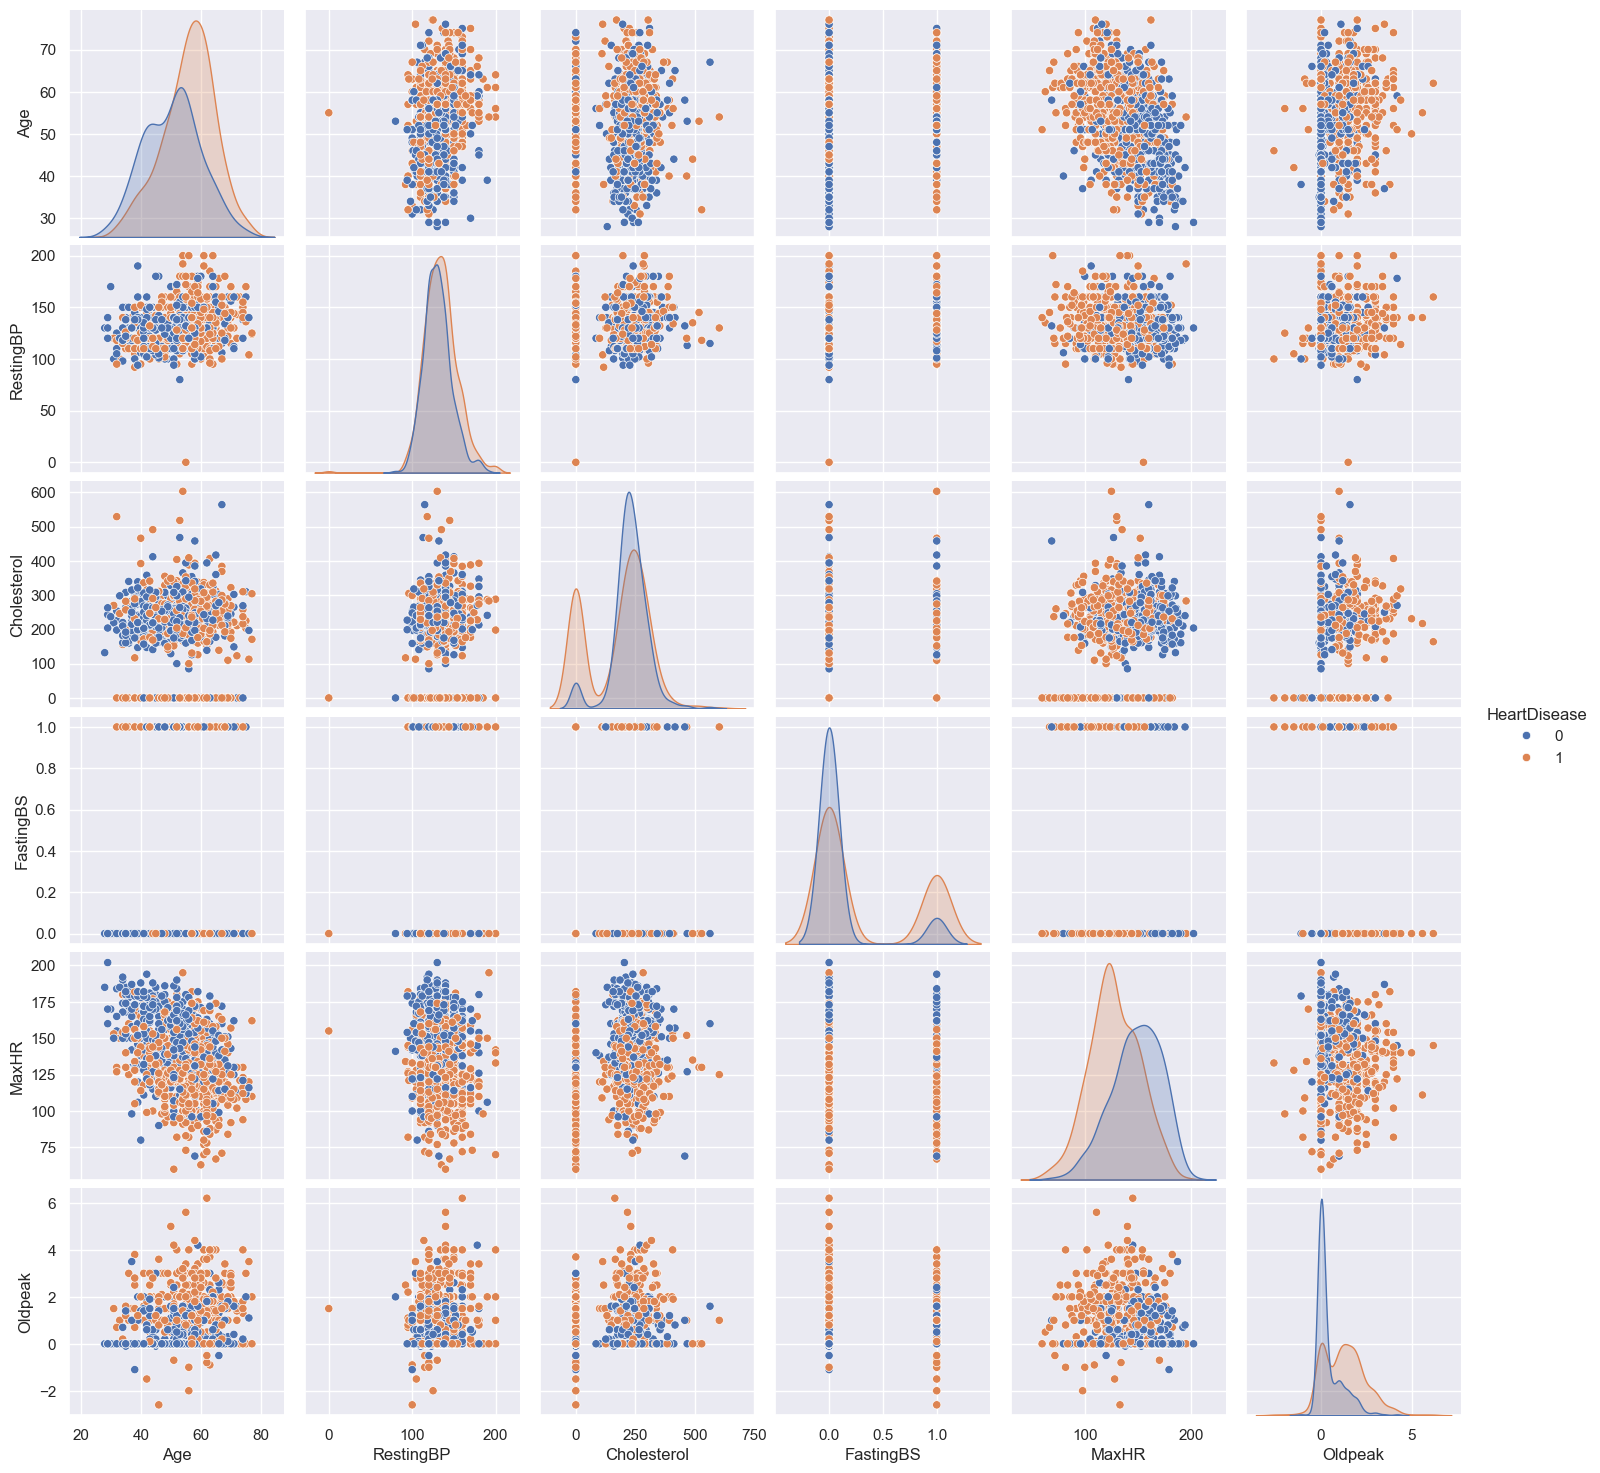

In [3]:
import seaborn as sns
sns.set()
sns.pairplot(data, hue='HeartDisease')

In [7]:
# Removing duplicates
# If the first value was 0, it means there is no duplication to begin with.
# But we applied the drop function anyway just in case you encounter a dataset with duplicated rows
print(data.duplicated().sum())
data_drop = data.drop_duplicates()
print(data_drop.duplicated().sum())

0
0


In [8]:
# encoding the non numerical columns
data_enc = pd.get_dummies(data_drop, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])
data_enc.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True


In [9]:
# Normalizing the columns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data_enc), columns=data_enc.columns)
data_scaled.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.244898,0.70,0.479270,0.0,0.788732,0.295455,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.428571,0.80,0.298507,0.0,0.676056,0.409091,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.183673,0.65,0.469320,0.0,0.267606,0.295455,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,0.408163,0.69,0.354892,0.0,0.338028,0.465909,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.530612,0.75,0.323383,0.0,0.436620,0.295455,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


In [11]:
# Splitting the Features and Label columns
labels_data = data_scaled['HeartDisease']
features_data = data_scaled.drop('HeartDisease', axis=1)

In [12]:
from sklearn.model_selection import train_test_split
# Split the X and y into train and test (0.2 refers to the 20\%)
X_train, X_test, y_train, y_test = train_test_split(features_data,labels_data, test_size = 0.2, random_state = 42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((734, 20), (734,), (184, 20), (184,))

In [14]:
# importing Logistic Regression
from sklearn.linear_model import LogisticRegression

In [15]:
# Creating the AI model object and training it
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [16]:
# Testing the accuracy score of the dataset
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(X_test)
    
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model: Logistic Regression")
print(f"Accuracy: {accuracy:.2f}")

Model: Logistic Regression
Accuracy: 0.86


In [17]:
# Define a function that transforms a normal data row to a testing row
def prepare_prediction_row(data_pred):
    data_pred = pd.DataFrame(data_pred)
    new_data = pd.concat([data, data_pred], ignore_index=False)
    #NOW, WE REPEAT THE SAME PREPROCESSING STEPS
    data_pred_encoded = pd.get_dummies(new_data, columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])
    data_pred_encoded.tail()
    data_test_scaled = pd.DataFrame(scaler.transform(data_pred_encoded), columns=data_pred_encoded.columns)
    row_to_predict = data_test_scaled.tail(1)
    row_to_predict = row_to_predict.drop('HeartDisease', axis=1)
    return row_to_predict

In [19]:
# Example of row transformation using the function
data_pred = {'Age': [40],
             'Sex': ['M'],
             'ChestPainType': ['ATA'],
            'RestingBP': [140],
            'Cholesterol': [289],
            'FastingBS': [0],
            'RestingECG': ['Normal'],
            'MaxHR': [172],
            'ExerciseAngina': ['N'],
            'Oldpeak': [0.0],
            'ST_Slope': ['Up']
            }
row_to_predict = prepare_prediction_row(data_pred)

In [20]:
# Predicting the row
classifier.predict(row_to_predict)

array([0.])

In [22]:
# Checking the probability of the prediction
# By predict probabilities of each class
probabilities = classifier.predict_proba(row_to_predict)
# Displaying the probabilities
print("Probabilities for each class:")
print(probabilities)

Probabilities for each class:
[[0.95938701 0.04061299]]
